In [82]:
import cv2
import matplotlib.pyplot as plt
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [83]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [84]:
classLabels= []
file_name= 'coco.names.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
#fpt.read() reads the entire content: 'dog\ncat\nbird\n'.rstrip('\n') removes the trailing newline, resulting in: 'dog\ncat\nbird'.split('\n') splits the string at each newline character, resulting in the list: ['dog', 'cat', 'bird']

In [85]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'potted plant', 'bed', 'dining table', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [86]:
print(len(classLabels))

80


In [99]:
model.setInputSize(320, 320)  # Set the input size as required by your model
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001B05EC4D470>

In [100]:
img= cv2.imread('carperson.jpg')

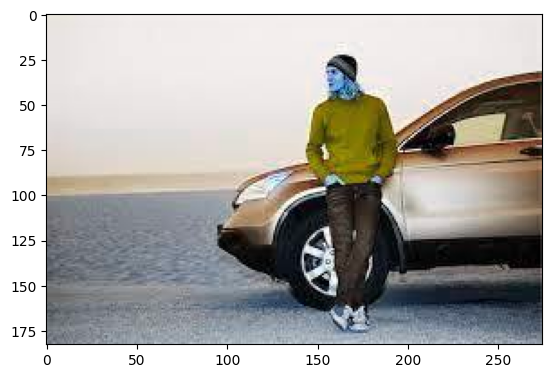

In [101]:
plt.imshow(img)

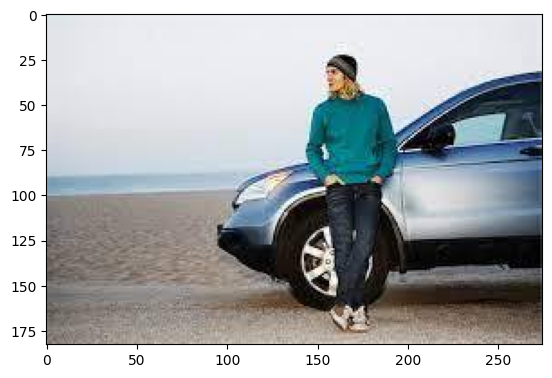

In [102]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [103]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [104]:
print(ClassIndex)

[1 3 4]


In [105]:
print(confidence)

[0.81253433 0.6437552  0.5337775 ]


In [106]:
print(bbox)

[[145  10  51 169]
 [ 84  40 191 125]
 [ 89  42 184 130]]


In [107]:
font_scale=2
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #img: The image on which to draw. boxes: The coordinates of the bounding box. (255,0,0): The color of the rectangle in BGR format (blue in this case). 2: The thickness of the rectangle's border.
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=2)

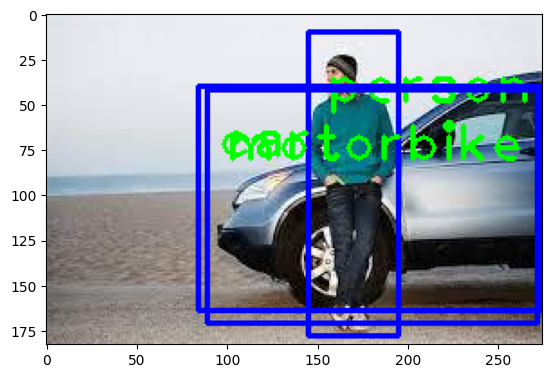

In [108]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [113]:
cap = cv2.VideoCapture(1)

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

In [115]:
while True:
    ret, frame = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd < 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1 1 1]
[1]
[1 1 1]
[1]
[1]
[1]
[1]
()
()
()
[87]
[77]
[77]
[77]
[87]
[1]
[87]
[87  1]
[87  1]
()
[77]
[77]
[77]
[77]
[77]
[77 77]
[77 77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77  1]
[77]
[77]
[77  1]
()
()
[77]
[77]
[77]
[77]
[77]
[77  1]
[77  1]
[1]
[77  1  1]
()
[1 1]
[1]
[ 1 77]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[87]
[1]
[1]
[1 1]
[87]
[87]
()
[87 87]
()
[1 1]
[87]
[87  1]
()
()
[1 1]
[1 1 1]
[ 1 60  1]
[ 1 60  1]
[87  1]
[ 1 43]
[ 1 87]
[ 1 87]
[1]
[ 1 87]
[43  1]

KeyboardInterrupt: 